**Predict the net hourly electrical energy output (EP) of the power plant from features like ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V**

# **Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# **Importing Dataset**

In [3]:
data = pd.read_excel('/content/sample_data/Folds5x2_pp.xlsx')

In [4]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


# **Define X and Y**

In [7]:
x = data.drop(['PE'],axis = 1).values
y = data['PE'].values

In [9]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [10]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


# **Spliting data into Training and Test Set**

In [12]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.3,random_state = 0)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6697, 4)
(6697,)
(2871, 4)
(2871,)


# **Training Model**

In [15]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Predicting on Test set**

In [17]:
y_pred = regressor.predict(x_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [20]:
compare = np.concatenate( ( y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)) ,axis = 1) 
print(compare)

[[431.23       431.40245096]
 [460.01       458.61474119]
 [461.14       462.81967423]
 ...
 [426.86       432.47380825]
 [433.4        436.16417243]
 [441.94       439.00714594]]


# **Evaluating model using R2 Score**

In [21]:
from sklearn.metrics import r2_score 
print(r2_score(y_test,y_pred))

0.9304112159477683


# **Ploting Result**

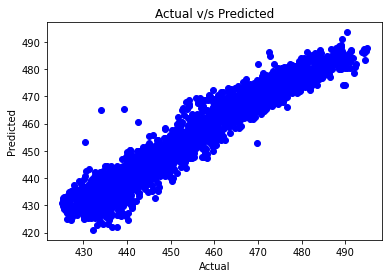

<Figure size 1080x720 with 0 Axes>

In [33]:
plt.scatter(y_test,y_pred,color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')
plt.figure(figsize=(15,10))
plt.show()

# **Difference between Actual and Predicted Value**

In [35]:
df = pd.DataFrame({'Actual' : y_test,'Predicted' : y_pred,'Difference' : y_test-y_pred})
print(df.head(10))

   Actual   Predicted  Difference
0  431.23  431.402451   -0.172451
1  460.01  458.614741    1.395259
2  461.14  462.819674   -1.679674
3  445.90  448.601237   -2.701237
4  451.29  457.879479   -6.589479
5  432.68  429.676856    3.003144
6  477.50  473.017115    4.482885
7  459.68  456.532373    3.147627
8  477.50  474.342524    3.157476
9  444.99  446.364396   -1.374396
